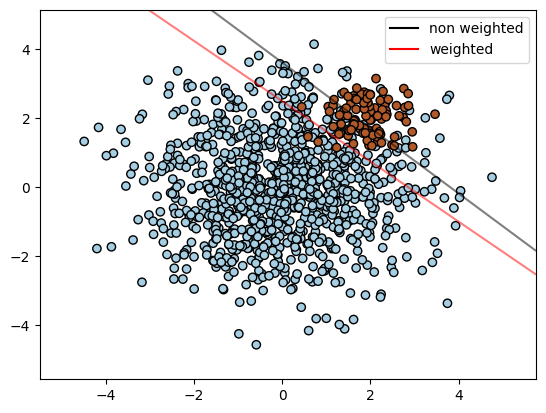

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [
        mlines.Line2D([], [], color="k", label="non weighted"),
        mlines.Line2D([], [], color="r", label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

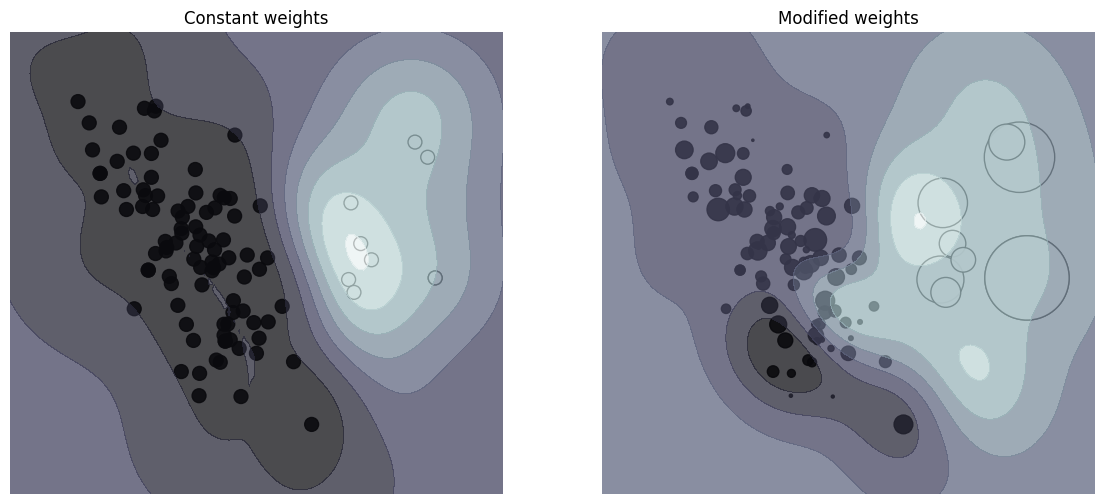

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.1,
    weights=[0.9, 0.1],
    random_state=0,
)
# down-sample for plotting
rng = np.random.RandomState(0)
plot_indices = rng.choice(np.arange(X.shape[0]), size=100, replace=True)
X_plot, y_plot = X[plot_indices], y[plot_indices]


def plot_decision_function(classifier, sample_weight, axis, title):
    """Plot the synthetic data and the classifier decision function. Points with
    larger sample_weight are mapped to larger circles in the scatter plot."""
    axis.scatter(
        X_plot[:, 0],
        X_plot[:, 1],
        c=y_plot,
        s=100 * sample_weight[plot_indices],
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_plot,
        response_method="decision_function",
        alpha=0.75,
        ax=axis,
        cmap=plt.cm.bone,
    )
    axis.axis("off")
    axis.set_title(title)


# we define constant weights as expected by the plotting function
sample_weight_constant = np.ones(len(X))
# assign random weights to all points
sample_weight_modified = abs(rng.randn(len(X)))
# assign bigger weights to the positive class
positive_class_indices = np.asarray(y == 1).nonzero()[0]
sample_weight_modified[positive_class_indices] *= 15

# This model does not include sample weights.
clf_no_weights = SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model includes sample weights.
clf_weights = SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_modified)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_modified, axes[1], "Modified weights")

plt.show()